# Importing Libraries


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory Data Analysis


In [4]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
file_path = "/content/drive/MyDrive/Colab Notebooks/CryptocoinsHeistData.csv"
df = pd.read_csv(file_path)

In [6]:
df.shape

(2916697, 10)

In [7]:
df.head(5)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [8]:
df.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [9]:
df["label"].value_counts()

,count
label,
white,2875284
paduaCryptoWall,12390
montrealCryptoLocker,9315
princetonCerber,9223
princetonLocky,6625
montrealCryptXXX,2419
montrealNoobCrypt,483
montrealDMALockerv3,354
montrealDMALocker,251


In [10]:
categorical_cols = df.select_dtypes(include="object").columns

In [11]:
numerical_cols = df.select_dtypes(include="number").columns

In [12]:
df.isnull().sum()

,0
address,0
year,0
day,0
length,0
weight,0
count,0
looped,0
neighbors,0
income,0
label,0


In [13]:
df["address"].nunique()

2631095

In [14]:
old_df = df.copy()

# Feature Engineering


In [15]:
df.drop(columns=["address", "year", "day"], axis=1, inplace=True)

In [16]:
for col in df.columns[:-1]:
    df[col] = df[col]

In [17]:
X = df.drop(columns=["label"])
y = df["label"]

In [18]:
X.columns

Index(['length', 'weight', 'count', 'looped', 'neighbors', 'income'], dtype='object')

In [19]:
df.head()

,length,weight,count,looped,neighbors,income,label
0,18,0.008333,1,0,2,100050000.0,princetonCerber
1,44,0.000244,1,0,1,100000000.0,princetonLocky
2,0,1.000000,1,0,2,200000000.0,princetonCerber
3,72,0.003906,1,0,2,71200000.0,princetonCerber
4,144,0.072848,456,0,1,200000000.0,princetonLocky


## Number of Instances


In [20]:
new_df = pd.DataFrame()
grouped = df.groupby("label")

In [21]:
new_df["num_of_instances"] = grouped.size()

## Average


In [22]:
df.columns

Index(['length', 'weight', 'count', 'looped', 'neighbors', 'income', 'label'], dtype='object')

In [23]:
for col in X.columns:
    new_df[f"{col}_avg"] = grouped[col].mean()

In [24]:
new_df.shape

(29, 7)

In [25]:
new_df.head()

,num_of_instances,length_avg,weight_avg,count_avg,looped_avg,neighbors_avg,income_avg
label,,,,,,,
montrealAPT,11,67.636364,0.707728,2047.000000,734.090909,2.545455,3.719873e+08
montrealComradeCircle,1,144.000000,0.051214,1241.000000,0.000000,2.000000,2.033200e+08
montrealCryptConsole,7,43.428571,0.593306,831.714286,0.000000,2.000000,4.546334e+07
montrealCryptXXX,2419,47.447706,0.367505,791.848284,61.022323,2.011988,1.355343e+08
montrealCryptoLocker,9315,30.674396,0.888878,308.328824,100.981535,2.885346,1.840825e+09


## Standard Deviation


In [26]:
for col in X.columns:
    new_df[f"{col}_std"] = grouped[col].agg(np.std).fillna(0)

<ipython-input-26-475c34e448b9>:2: FutureWarning: The provided callable <function std at 0x7b461af8e3e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  new_df[f"{col}_std"]=grouped[col].agg(np.std).fillna(0)
<ipython-input-26-475c34e448b9>:2: FutureWarning: The provided callable <function std at 0x7b461af8e3e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  new_df[f"{col}_std"]=grouped[col].agg(np.std).fillna(0)
<ipython-input-26-475c34e448b9>:2: FutureWarning: The provided callable <function std at 0x7b461af8e3e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  new_df[f"{col}_std"]=grouped[col].agg(np.std).fillna(0)
<

## Minimum


In [27]:
for col in X.columns:
    new_df[f"{col}_min"] = grouped[col].min()

## Maximum


In [28]:
for col in X.columns:
    new_df[f"{col}_max"] = grouped[col].max()

In [29]:
new_df = new_df.reset_index()
new_df.head()

,label,num_of_instances,length_avg,weight_avg,count_avg,looped_avg,neighbors_avg,income_avg,length_std,weight_std,...,count_min,looped_min,neighbors_min,income_min,length_max,weight_max,count_max,looped_max,neighbors_max,income_max
0,montrealAPT,11,67.636364,0.707728,2047.000000,734.090909,2.545455,3.719873e+08,73.145434,0.600596,...,1,0,1,57142857.0,144,1.666667,8076,8073,6,1.088599e+09
1,montrealComradeCircle,1,144.000000,0.051214,1241.000000,0.000000,2.000000,2.033200e+08,0.000000,0.000000,...,1241,0,2,203320001.0,144,0.051214,1241,0,2,2.033200e+08
2,montrealCryptConsole,7,43.428571,0.593306,831.714286,0.000000,2.000000,4.546334e+07,68.747987,0.410909,...,1,0,2,30000000.0,144,1.000000,3191,0,2,5.030000e+07
3,montrealCryptXXX,2419,47.447706,0.367505,791.848284,61.022323,2.011988,1.355343e+08,58.187904,0.434143,...,1,0,1,30000000.0,144,3.458951,9262,8489,15,1.080000e+09
4,montrealCryptoLocker,9315,30.674396,0.888878,308.328824,100.981535,2.885346,1.840825e+09,50.731602,1.555608,...,1,0,1,30000000.0,144,31.108593,6423,6418,79,4.450000e+11


# Data Preprocessing


## Undersampling


In [30]:
black_rows = df[df["label"] != "white"]

In [31]:
white_sample = df[df["label"] == "white"].sample(n=158587, random_state=42)

In [32]:
sampled_df = pd.concat([black_rows, white_sample]).sample(frac=1, random_state=50)
sampled_df.head()

,length,weight,count,looped,neighbors,income,label
526724,14,0.003906,1,0,2,3.216000e+09,white
2825235,144,0.196970,1805,0,2,5.578352e+07,white
7558,14,0.015625,1,0,2,6.355311e+08,montrealCryptoLocker
1141393,6,1.000000,1,0,2,2.925100e+08,white
1484054,142,0.065711,2568,0,2,1.360000e+08,white


## Label Encoding


In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

sampled_df["label"] = label_encoder.fit_transform(sampled_df["label"])

sampled_df["label"] = sampled_df["label"].apply(
    lambda x: 0 if x == label_encoder.transform(["white"])[0] else 1
)

sampled_df["label"]

,label
526724,0
2825235,0
7558,1
1141393,0
1484054,0
...,...
1363905,0
1934713,0
2481475,0
2039010,0


## Z-score Anomaly Filteration


In [34]:
z_score_df = pd.DataFrame()
for col in sampled_df.columns:
    z_score_df[f"{col}_z_score"] = (
        sampled_df[col] - sampled_df[col].mean()
    ) / sampled_df[col].std()
z_score_df.head()

,length_z_score,weight_z_score,count_z_score,looped_z_score,neighbors_z_score,income_z_score,label_z_score
526724,-0.513441,-0.114174,-0.424426,-0.234473,-0.009561,-0.004920,-0.511015
2825235,1.695481,-0.075626,0.677535,-0.234473,-0.009561,-0.028981,-0.511015
7558,-0.513441,-0.111834,-0.424426,-0.234473,-0.009561,-0.024567,1.956881
1141393,-0.649374,0.084711,-0.424426,-0.234473,-0.009561,-0.027178,-0.511015
1484054,1.661498,-0.101834,1.143608,-0.234473,-0.009561,-0.028370,-0.511015


In [35]:
import pandas as pd

filtered_df = z_score_df[
    z_score_df.apply(lambda row: all(-3 <= val <= 3 for val in row), axis=1)
]

filtered_df.head()

,length_z_score,weight_z_score,count_z_score,looped_z_score,neighbors_z_score,income_z_score,label_z_score
526724,-0.513441,-0.114174,-0.424426,-0.234473,-0.009561,-0.004920,-0.511015
2825235,1.695481,-0.075626,0.677535,-0.234473,-0.009561,-0.028981,-0.511015
7558,-0.513441,-0.111834,-0.424426,-0.234473,-0.009561,-0.024567,1.956881
1141393,-0.649374,0.084711,-0.424426,-0.234473,-0.009561,-0.027178,-0.511015
1484054,1.661498,-0.101834,1.143608,-0.234473,-0.009561,-0.028370,-0.511015


## Train Test Split


> Training data: 66%
> Test data: 33%


In [36]:
X = sampled_df.drop("label", axis=1)
y = (sampled_df["label"] > 0).astype("int")

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.33, shuffle=True
)

## Standardization


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_train

,length,weight,count,looped,neighbors,income
879605,2,1.000000,1,0,2,2.507106e+09
30158,2,1.750000,3,0,2,2.050000e+08
2047480,0,1.000000,1,0,1,4.624300e+07
2646853,2,0.500000,1,0,2,1.083578e+08
554521,98,0.151310,188,0,2,1.421065e+09
...,...,...,...,...,...,...
98191,6,0.129808,27,0,2,4.477000e+09
24810,144,0.095984,2007,0,2,1.300000e+09
2015889,144,0.024539,2366,1828,4,2.581935e+08
1284526,0,0.500000,1,0,2,6.105357e+07


In [41]:
X_train_scaled

array([[-0.71865397,  0.07180682, -0.42545353, -0.2354595 , -0.0097565 ,
        -0.01514621],
       [-0.71865397,  0.20065128, -0.42423159, -0.2354595 , -0.0097565 ,
        -0.04021236],
       [-0.75261953,  0.07180682, -0.42545353, -0.2354595 , -0.03766732,
        -0.04194096],
       ...,
       [ 1.6929008 , -0.09577009,  1.01949151,  1.81058308,  0.04606515,
        -0.03963317],
       [-0.75261953, -0.01408949, -0.42545353, -0.2354595 , -0.0097565 ,
        -0.0417797 ],
       [ 1.6929008 , -0.09406117,  1.78992521, -0.2354595 , -0.03766732,
        -0.03638728]])

In [42]:
y_train

,label
879605,0
30158,1
2047480,0
2646853,0
554521,0
...,...
98191,0
24810,1
2015889,0
1284526,0


In [45]:
import joblib

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [46]:
print(f"Scaler type: {type(scaler)}")

Scaler type: <class 'sklearn.preprocessing._data.StandardScaler'>


In [47]:
print(f"Means: {scaler.mean_}")
print(f"Variances: {scaler.var_}")
print(f"Number of features: {len(scaler.mean_)}")

Means: [4.43166269e+01 5.82014499e-01 6.97357000e+02 2.10367060e+02
 2.34955970e+00 3.89815293e+09]
Variances: [3.46722823e+03 3.38837158e+01 2.67891931e+06 7.98220815e+05
 1.28367402e+03 8.43481291e+21]
Number of features: 6


# Training


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

param_grid = {
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring="accuracy"
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy during CV:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Accuracy during CV: 0.8401026119402986


RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

# Evaluation


In [ ]:
val_predictions = best_rf.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.8371641791044776


In [ ]:
test_predictions = best_rf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8432575757575758


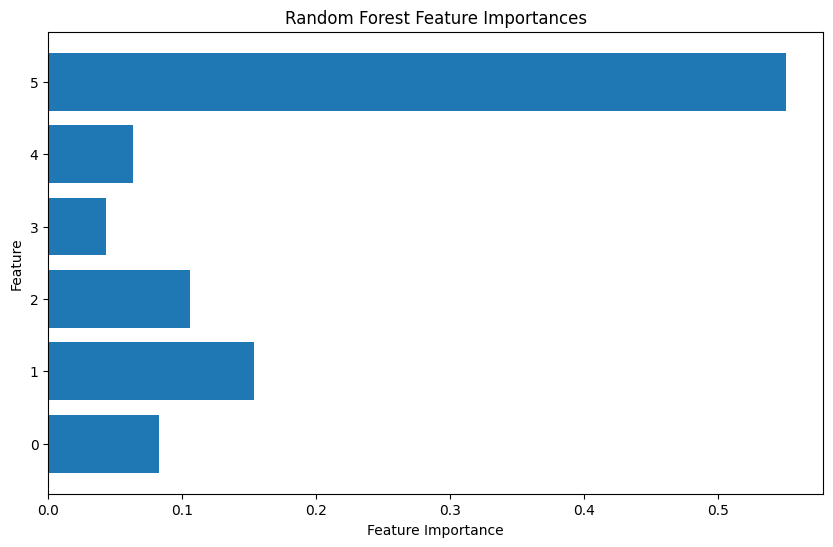

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), best_rf.feature_importances_, align="center")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importances")
plt.show()

In [ ]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     52447
           1       0.70      0.41      0.52     13553

    accuracy                           0.84     66000
   macro avg       0.78      0.68      0.71     66000
weighted avg       0.83      0.84      0.83     66000



In [ ]:
import joblib
from google.colab import files

model_filename = "model.pkl"
joblib.dump(best_rf, model_filename)

files.download(model_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>